In [338]:
import FHMM
import cPickle as pk
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline

In [104]:
with open('predictions.pkl') as f:
    predictions = pk.load(f)

with open('test2.pkl') as f:
    test = pk.load(f)

In [314]:
Min15_pred = predictions.resample('15Min').mean()
Min15_test = test.resample('15Min').mean()

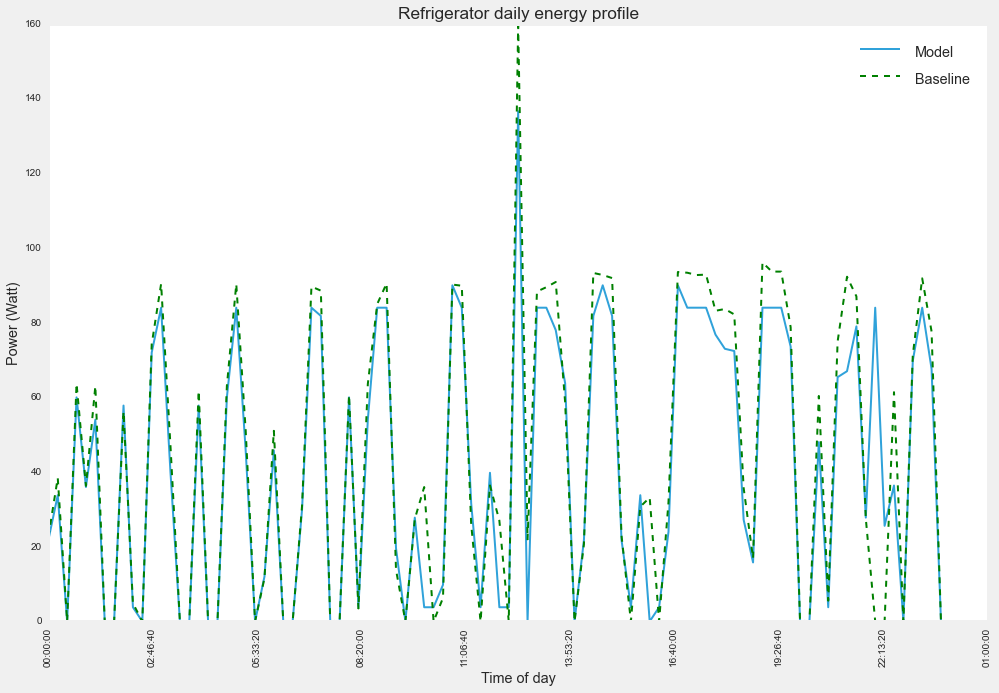

In [346]:
subset_pred = Min15_pred[['channel_12']]['2013-09-01']
subset_act = Min15_test[['channel_12']]['2013-09-01']
subset_pred['time'] = subset_pred.index.time

channel_12_pred = subset_pred[['channel_12']].values
channel_12_act = subset_act.values

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (15,10))
    plt.axes(axisbg = 'white')
    plt.xticks(rotation='vertical')
    plt.plot(subset_pred['time'],channel_12_pred, linewidth = 2,  label = 'Model')
    plt.plot(subset_pred['time'], channel_12_act, '--', color = 'g', linewidth = 2, label = 'Baseline')
    plt.ylabel('Power (Watt)',{'fontsize': 'x-large', 'rotation':'vertical'})
    plt.xlabel('Time of day',{'fontsize': 'x-large'})
    plt.title('Refrigerator daily energy profile', fontdict = {'fontsize' :'xx-large'})
    plt.grid(b=False)
    plt.legend(loc = 1, fontsize = 'x-large');

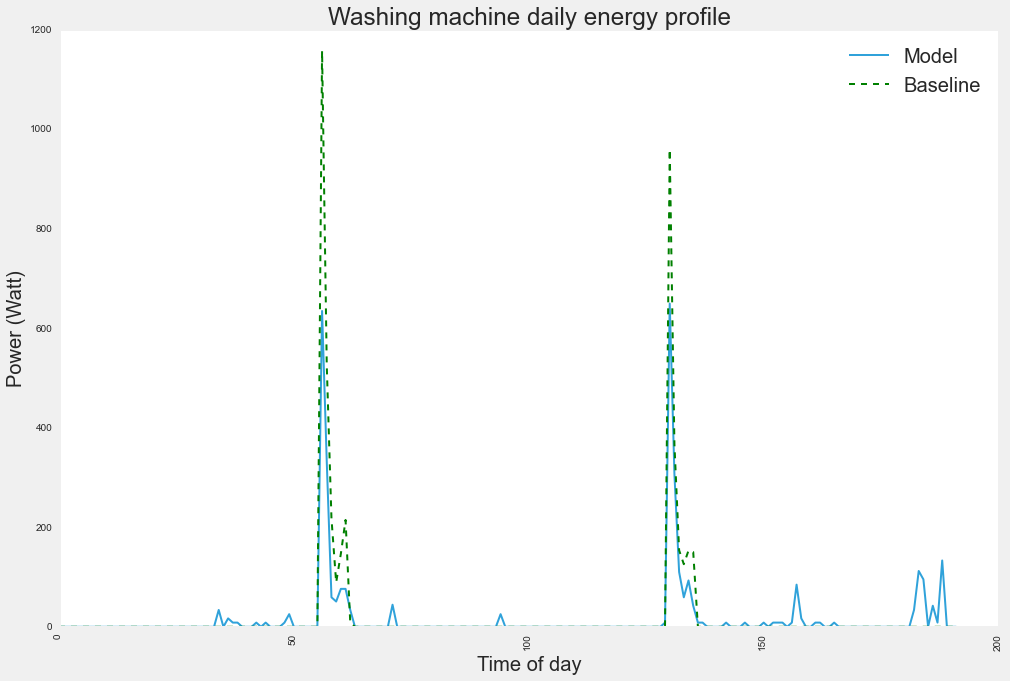

In [356]:
subset_pred = Min15_pred[['channel_5']]['2013-09-03':'2013-09-04']
subset_act = Min15_test[['channel_5']]['2013-09-03':'2013-09-04']
subset_pred['time'] = subset_pred.index.time

channel_12_pred = subset_pred[['channel_5']].values
channel_12_act = subset_act.values

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (15,10))
    plt.axes(axisbg = 'white')
    plt.xticks(rotation='vertical')
    plt.plot(channel_12_pred, linewidth = 2,  label = 'Model')
    plt.plot(channel_12_act, '--', color = 'g', linewidth = 2, label = 'Baseline')
    plt.ylabel('Power (Watt)',{'fontsize': 'x-large', 'rotation':'vertical'})
    plt.xlabel('Time of day',{'fontsize': 'x-large'})
    plt.title('Washing machine daily energy profile', fontdict = {'fontsize' :'xx-large'})
    plt.grid(b=False)
    plt.legend(loc = 1, fontsize = 'x-large');

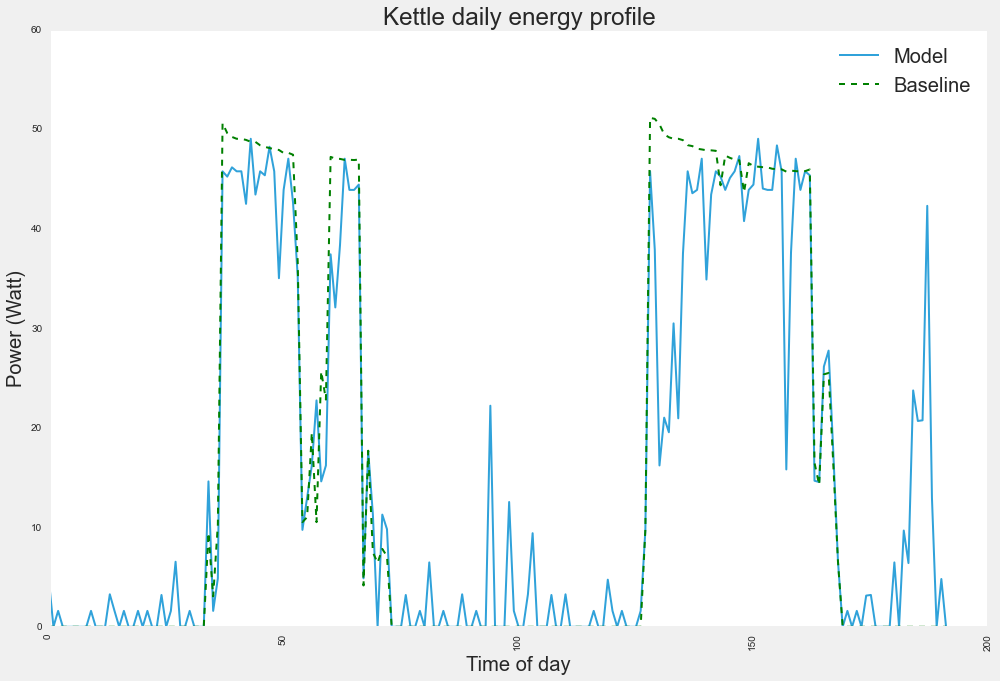

In [403]:
subset_pred = Min15_pred[['channel_3']]['2013-09-03':'2013-09-04']
subset_act = Min15_test[['channel_3']]['2013-09-03':'2013-09-04']
subset_pred['time'] = subset_pred.index.time

channel_12_pred = subset_pred[['channel_3']].values
channel_12_act = subset_act.values

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (15,10))
    plt.axes(axisbg = 'white')
    plt.xticks(rotation='vertical')
    plt.plot(channel_12_pred, linewidth = 2,  label = 'Model')
    plt.plot(channel_12_act, '--', color = 'g', linewidth = 2, label = 'Baseline')
    plt.ylabel('Power (Watt)',{'fontsize': 'x-large', 'rotation':'vertical'})
    plt.xlabel('Time of day',{'fontsize': 'x-large'})
    plt.title('Kettle daily energy profile', fontdict = {'fontsize' :'xx-large'})
    plt.grid(b=False)
    plt.legend(loc = 1, fontsize = 'x-large');

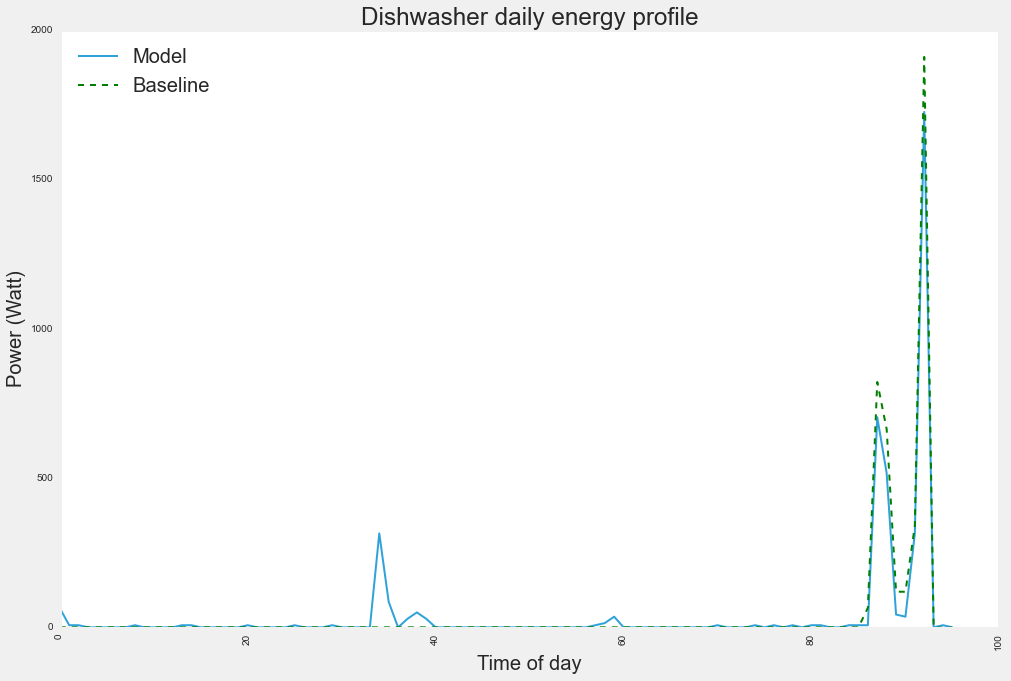

In [449]:
# channel = 'channel_6'
# channel_pred = Min15_pred[channel]['2013-09-04 00:00:00':'2013-09-04 23:59:59']
# idx = channel_pred.index
# channel_act = Min15_test.loc[idx][[channel]]

# plt.figure(figsize = (15,10))
# ax = channel_pred.plot(label = 'predicted',color = 'red')
# channel_act.plot(ax = ax, label = 'observed')
# plt.legend(title = channel);

subset_pred = Min15_pred[['channel_6']]['2013-09-04 00:00:00':'2013-09-04 23:59:59']
subset_act = Min15_test[['channel_6']]['2013-09-04 00:00:00':'2013-09-04 23:59:59']
subset_pred['time'] = subset_pred.index.time

channel_12_pred = subset_pred[['channel_6']].values
channel_12_act = subset_act.values

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (15,10))
    plt.axes(axisbg = 'white')
    plt.xticks(rotation='vertical')
    plt.plot(channel_12_pred, linewidth = 2,  label = 'Model')
    plt.plot(channel_12_act, '--', color = 'g', linewidth = 2, label = 'Baseline')
    plt.ylabel('Power (Watt)',{'fontsize': 'x-large', 'rotation':'vertical'})
    plt.xlabel('Time of day',{'fontsize': 'x-large'})
    plt.title('Dishwasher daily energy profile', fontdict = {'fontsize' :'xx-large'})
    plt.grid(b=False)
    plt.legend(loc = 2, fontsize = 'x-large');

In [312]:
start = '2013-09-07'
end = '2013-09-10'
hourly_samples = test.resample('120Min').mean()[start:end]
hourly_pred = predictions.resample('120Min').mean()[start:end]
hourly_samples['hour'] = hourly_samples.index.hour
hourly_samples['day'] = hourly_samples.index.date
hourly_samples.head()
xlabels = hourly_samples['day'].values

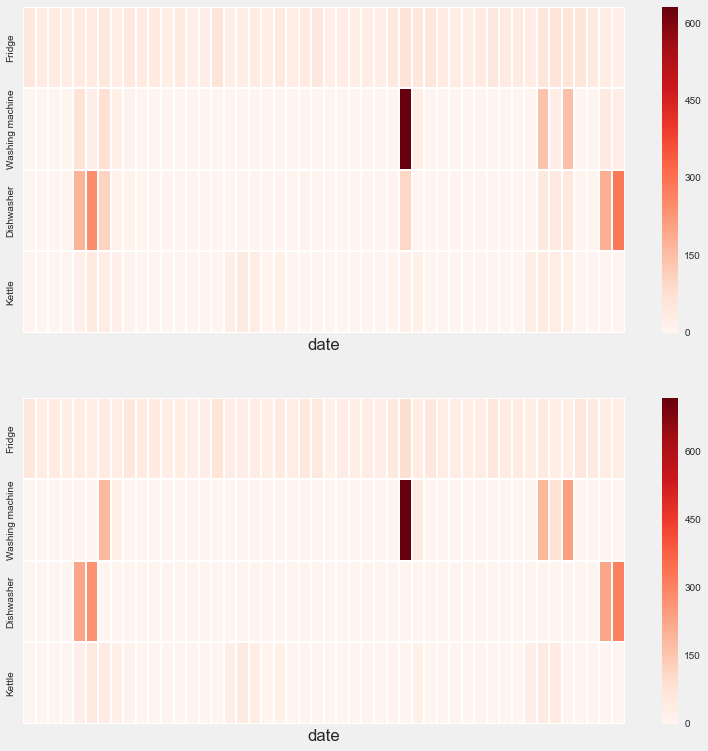

In [313]:
df_list = [hourly_pred,hourly_samples]
with plt.style.context('fivethirtyeight'):
    f, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(12, 12))
    for axis,df in zip(axes,df_list):
        sns.heatmap(df[['channel_12','channel_5','channel_6','channel_3']].T, xticklabels = False,
                    yticklabels = ['Fridge','Washing machine','Dishwasher','Kettle'], 
                    ax = axis,cmap="Reds", linewidths=.5)
    

/Users/nelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


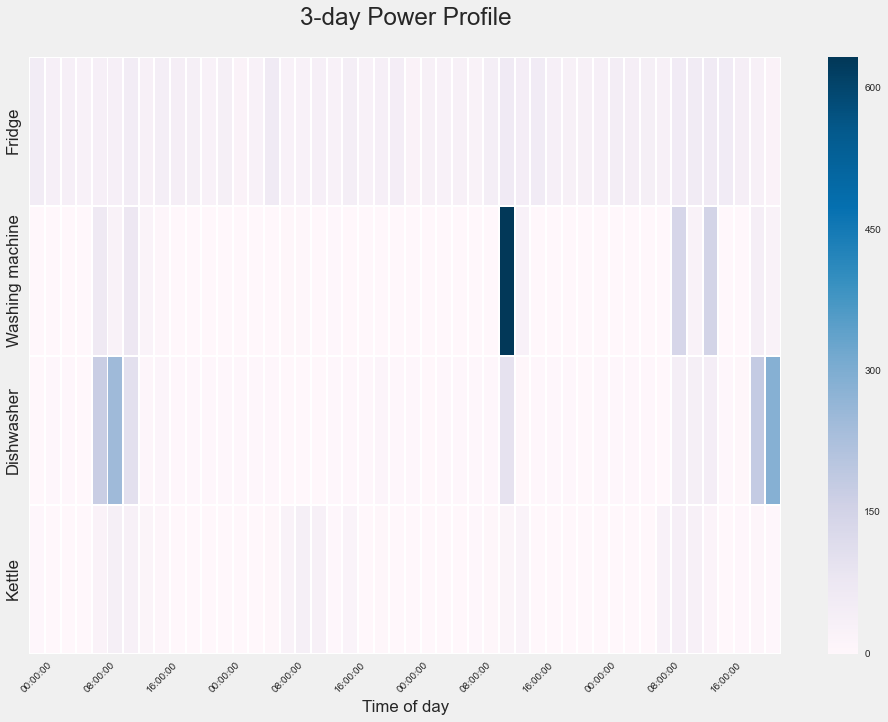

In [450]:
plot_data = hourly_pred[['channel_12','channel_5','channel_6','channel_3']]
# plot_data['day'] = plot_data.index.date
plot_data['Time of day'] = plot_data.index.time
plot_data = plot_data.reset_index().set_index(['Time of day']).drop('date',axis =1)

fig = plt.figure(figsize = (15,10))
plt.title('3-day Power Profile \n', fontdict = {'fontsize' :'xx-large'})
plt.xticks(rotation=45)
plt.yticks(fontsize ='large')
ax = sns.heatmap(plot_data.T, xticklabels = 4,
                    yticklabels = ['Fridge','Washing machine','Dishwasher','Kettle'], 
                    cmap="PuBu", linewidths=.5);

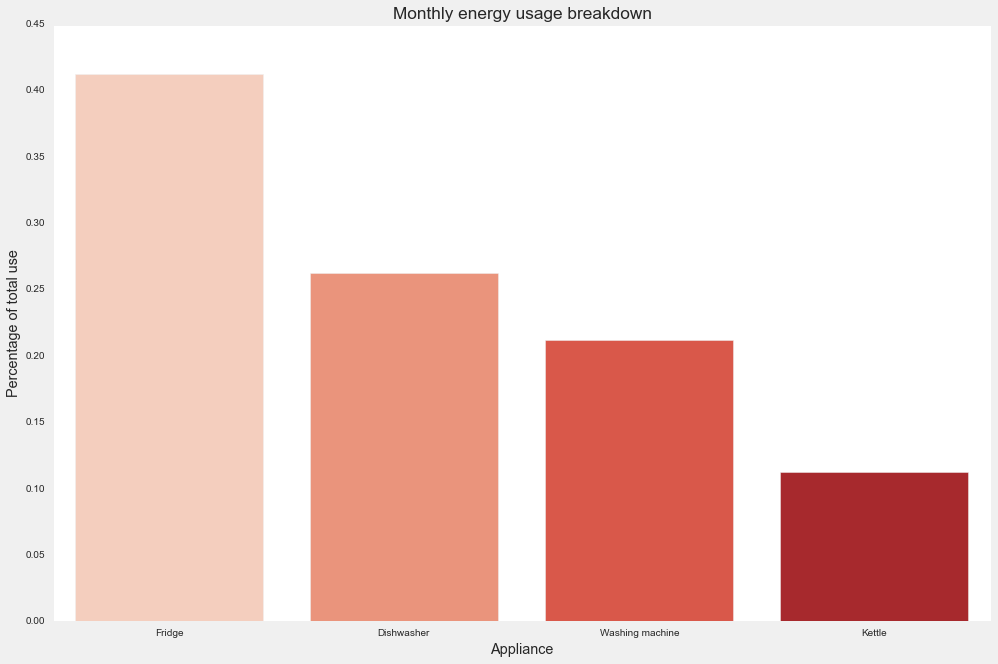

In [278]:
idx = np.argsort(predictions.sum().values)[::-1]
values = predictions.sum().values
y = [values[i] for i in idx]/np.sum(values)
columns = ['Fridge','Kettle','Washing machine','Dishwasher']
x = [columns[i] for i in idx]

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (15,10))
    plt.axes(axisbg = 'white')
    sns.barplot(x,y,palette = "Reds")

    plt.ylabel('Percentage of total use',{'fontsize': 'x-large', 'rotation':'vertical'})
    plt.xlabel('Appliance',{'fontsize': 'x-large'})
    plt.title('Monthly energy usage breakdown', fontdict = {'fontsize' :'xx-large'})
    plt.grid(b=False)
    plt.legend(loc = 1, fontsize = 'x-large');